## Add Luxor package

In [1]:
using Pkg
Pkg.add("Luxor")
Pkg.add("Colors")
using Luxor
using Colors

    Updating registry at `C:\Users\17404\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`


## Test

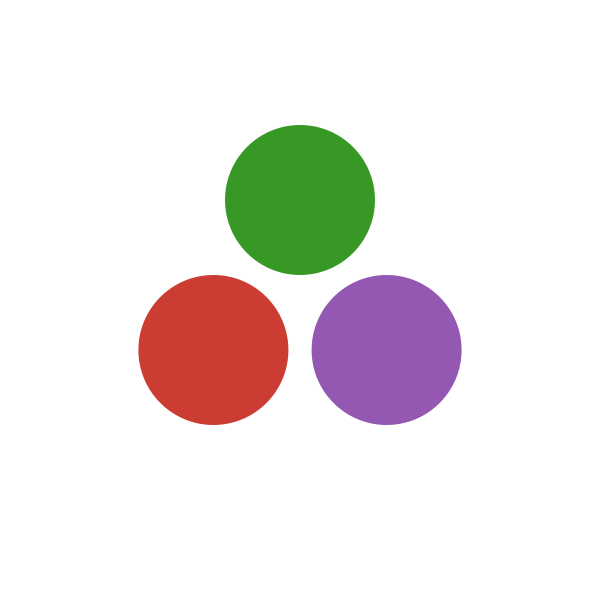

In [2]:
@svg juliacircles()

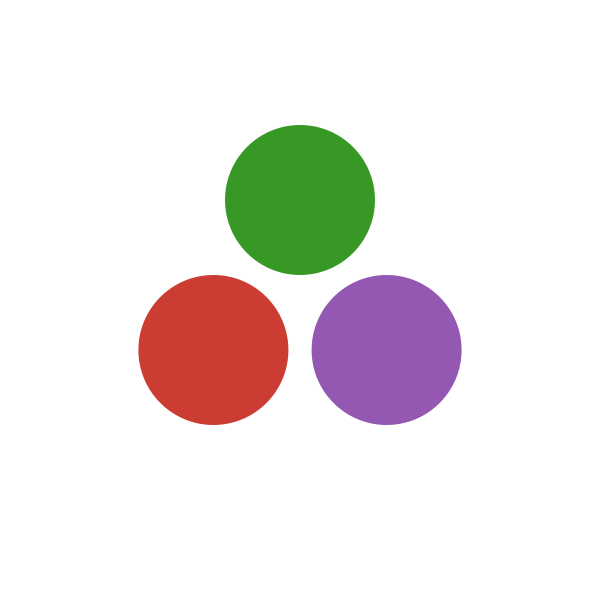

In [3]:
@png juliacircles()

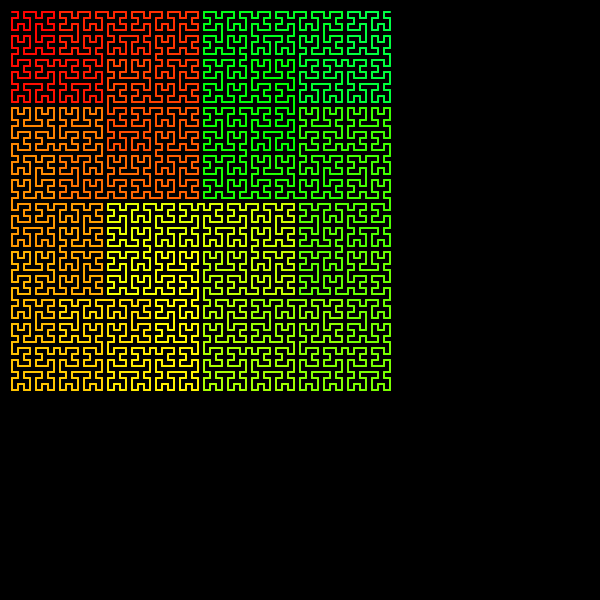

In [4]:
function hilbert(t::Turtle, level, angle, lengthstep)
    level == 0 && return

    HueShift(t, 0.1)

    Turn(t, angle)
    hilbert(t, level-1, -angle, lengthstep)

    Forward(t, lengthstep)
    Turn(t, -angle)
    hilbert(t, level-1, angle, lengthstep)

    Forward(t, lengthstep)
    hilbert(t, level-1, angle, lengthstep)

    Turn(t, -angle)
    Forward(t, lengthstep)
    hilbert(t, level-1, -angle, lengthstep)

    Turn(t, angle)
end

@draw begin
background("black")
setline(2)
setlinecap("round")

hilbert(Turtle(first(BoundingBox()) + (12, 12), true, 0, (1, 0, 0)),
        6,  # level
        90, # turn angle, in degrees
        6   # steplength
        )
end

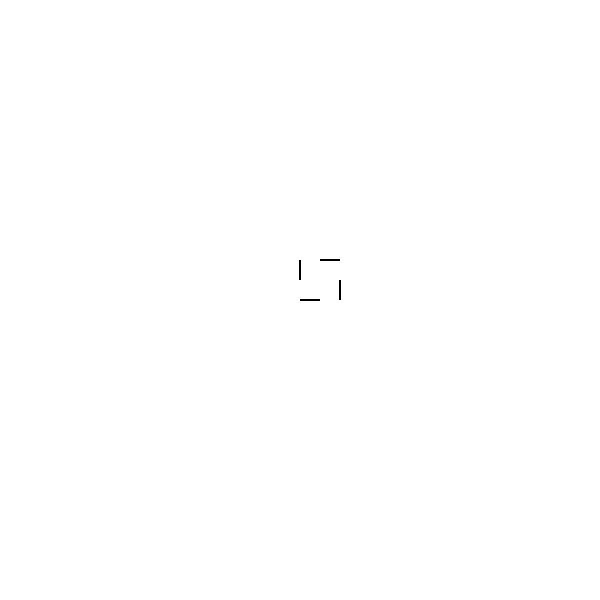

In [5]:
@draw begin
    t = Turtle()
    for i in 1:4
        Forward(t, 20)
        Penup(t)
        Forward(t, 20)
        Pendown(t)
        Turn(t, -90)
    end
end

# Functions of dart and kite

In [6]:
phi = (1 + sqrt(5)) / 2 # name the gploden ratio by phi

1.618033988749895

In [7]:
# use turtle graphic to draw a simple dart
function dart(t,length) # t is the name of turtle, length is the length of shorter side of the dart
    Forward(t, length)
    Turn(t, -36)
    Forward(t, length)
    Turn(t, 144)
    Forward(t, length * phi)
    Turn(t, 108)
    Forward(t, length * phi)
    Turn(t, 144)
end

dart (generic function with 1 method)

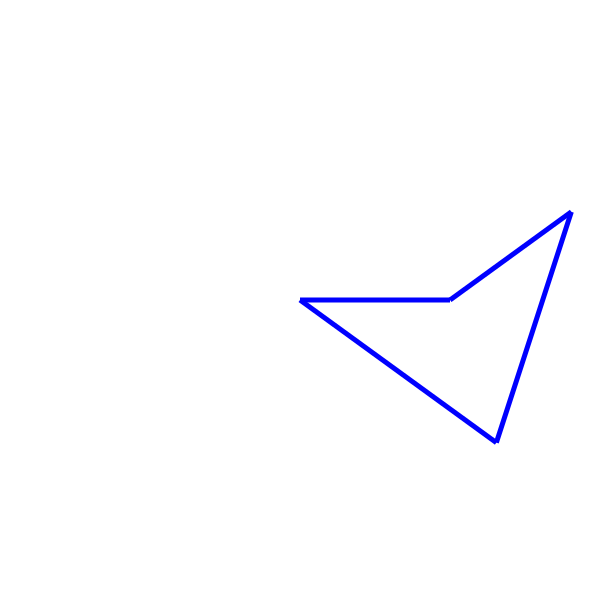

In [9]:
# show this on a graph paper
@draw begin
    t = Turtle()
    Penwidth(t,5)
    Pencolor(t, "Blue")
    dart(t, 150)
end

In [10]:
# use turtle graphic to draw a simple kite
function kite(t, length)
    Turn(t, 108)
    Forward(t, length)
    Turn(t, 108)
    Forward(t, length * phi)
    Turn(t, 108)
    Forward(t, length * phi)
    Turn(t, 108)
    Forward(t, length)
    Turn(t, -72)
end

kite (generic function with 1 method)

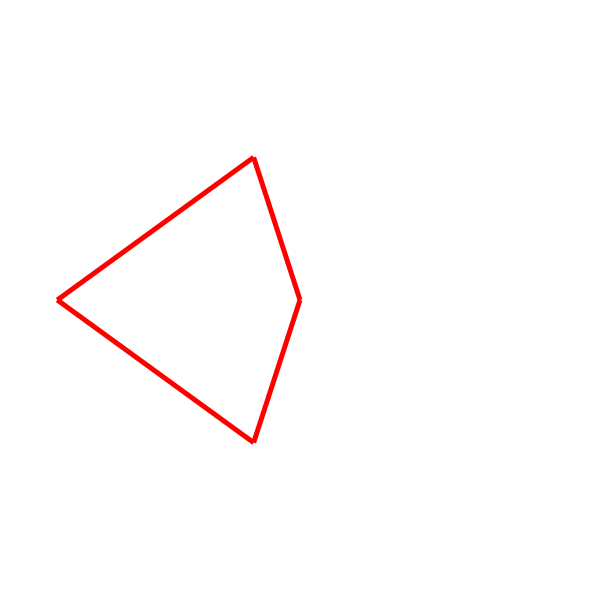

In [11]:
# show the kite on graph paper
@draw begin
    t = Turtle()
    Penwidth(t,5)
    Pencolor(t, "Red")
    kite(t, 150)
end

## Substitution rules

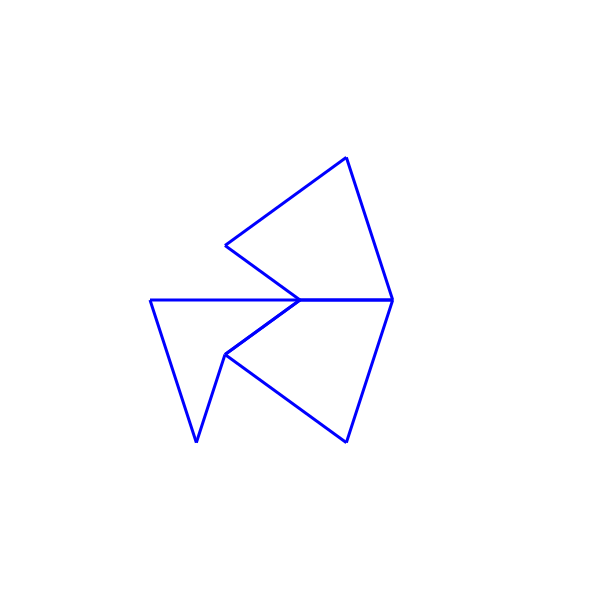

In [12]:
# this function shows the rule of how to subsitute the kite once, which will generate two kite and two dart
function subkite(t,length)
    Turn(t, 144)
    dart(t, length/phi)
    Turn(t, -36)
    kite(t, length/phi)
    Turn(t, 144)
    kite(t, length/phi)
end

#show the substitution on the paper
@draw begin
    t = Turtle()
    Penwidth(t,3)
    Pencolor(t, "Blue")
    subkite(t, 150)
end

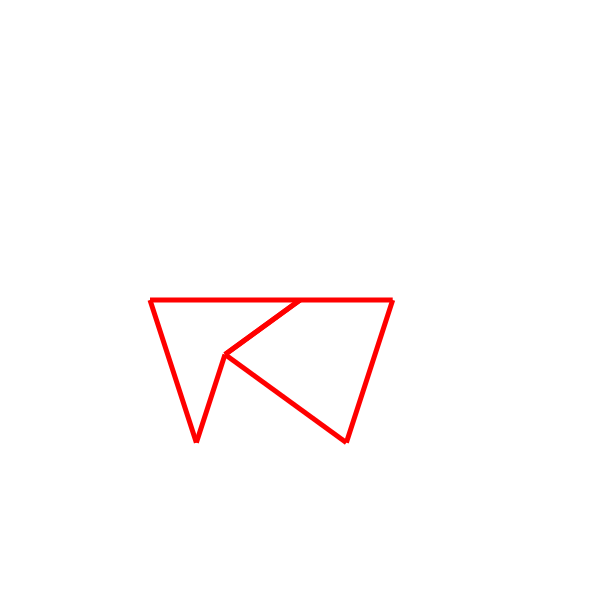

In [13]:
# beacuse the substitution of dart just need one kite and one dart, we can modify the function based on last one
function subdart(t,length)
    Turn(t, 144)
    dart(t, length/phi)
    Turn(t, 108)
    kite(t, length/phi)
end

#show this on a paper
@draw begin
    t = Turtle()
    Penwidth(t,5)
    Pencolor(t, "Red")
    subdart(t, 150)
end

## Substitution once

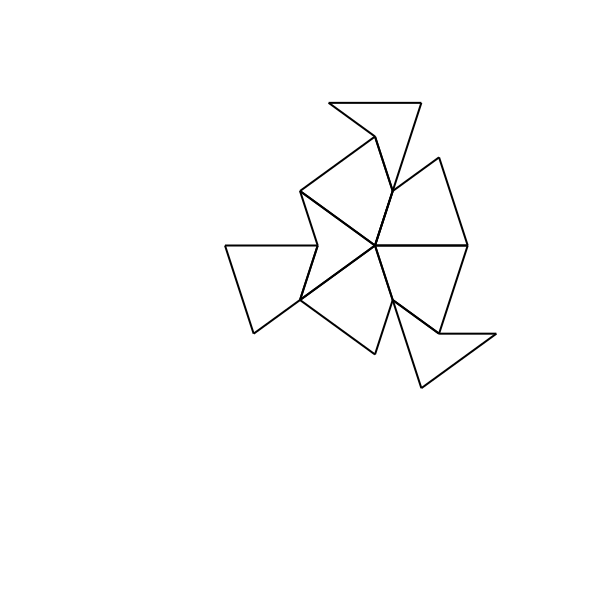

In [17]:
# using the pervious two function we can find the ratations center of them and place them in an order
function sub2kite()
    Turn(t, 144)
    subdart(t, a)
    
    Penup(t)
    Turn(t, -72)
    Forward(t, a)
    Turn(t, 108)
    Forward(t, a/phi)
    Turn(t, 180)
    Pendown(t)
    
    subkite(t,a)
    
    Penup(t)
    Turn(t, 108)
    Forward(t, a/phi)
    Turn(t, 36)
    Forward(t, a/phi)
    Turn(t, 180)
    Pendown(t)
    
    subkite(t,a)
    Turn(t, 108)
    Forward(t, a/phi)
end

@draw begin
    a = 150/phi
    t = Turtle()
    sub2kite()
end

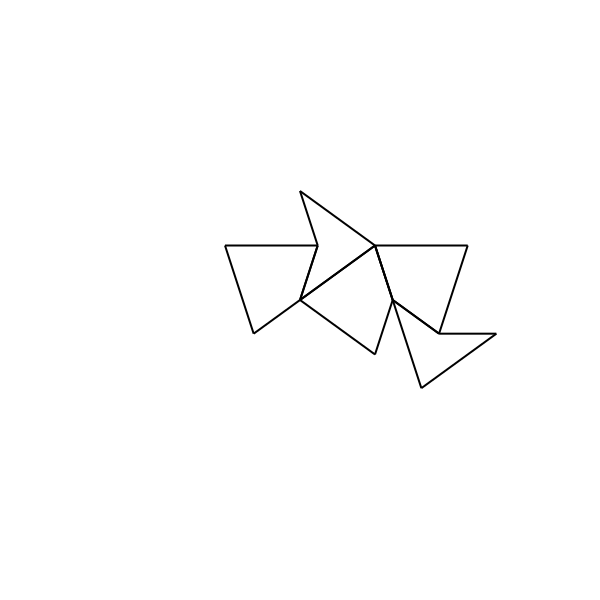

In [18]:
# based on the last one, the substitution of the kite, we can make the corresponding generation of a dart
function sub2dart()
    Turn(t, 144)
    subdart(t, a)
    
    Penup(t)
    Turn(t, -72)
    Forward(t, a)
    Turn(t, 108)
    Forward(t, a/phi)
    Turn(t, 180)
    Pendown(t)
    
    subkite(t,a)
    Turn(t, 108)
    Forward(t, a/phi)
end
    
@draw begin
    a = 150/phi
    t = Turtle()
    sub2dart()
end

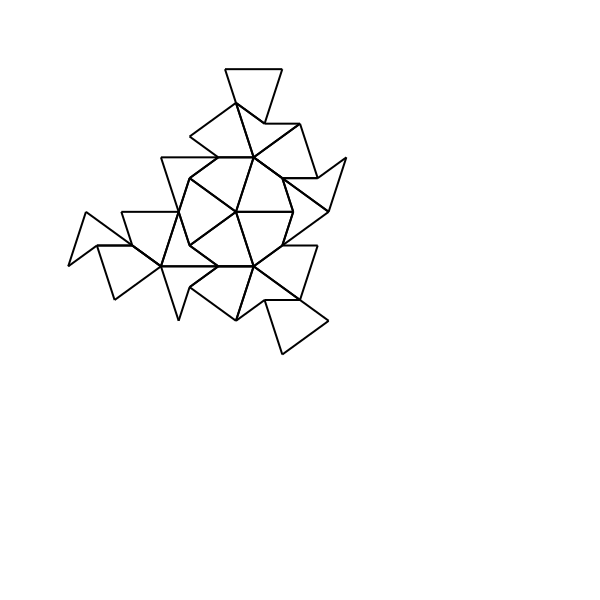

In [19]:
# by repeating pack up the lasest substitution of kite and dart, we can form the substitution of any generation 
# with the rotation of one dart and two kite.
@draw begin
    a = 150/(phi^2)
    t = Turtle()
    Turn(t, -108)
    sub2kite()
    
    Penup(t)
    Turn(t, -108)
    Forward(t, a)
    Turn(t, 36)
    Forward(t, 2*a)
    Turn(t, -108)
    Forward(t, a/phi)
    Pendown(t)
    
    Turn(t, -72)
    sub2kite()
    
    Penup(t)
    Turn(t, -108)
    Forward(t, a)
    Turn(t, 72)
    Forward(t, a)
    Turn(t, -36)
    Pendown(t)
    
    sub2dart()
end

## Storage

In [20]:
tiles = Dict()#empty dictionary for storage of tiles information
tiles[1] = ["K"],[0],[0],[0]#"K" means kite, or "D" means dart, first digit means x, second is y, thid is the orienatation
tiles# show the dictionary

Dict{Any, Any} with 1 entry:
  1 => (["K"], [0], [0], [0])